# Music Genre Based Playlist Generator - Phase2

#### by Bharath Prathap Nair (AM.EN.U4CSE19113)



##### Dataset Source : Kaggle [https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s?select=2010.csv ]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/Phase2/modifiedDataset.csv')
print(data.head())

   Unnamed: 0       PC1       PC2       PC3  top genre
0           0  3.616142 -2.822903  2.304606         19
1           1  4.398339 -3.324495  1.631486         14
2           2 -0.313810 -2.883387  1.236102         13
3           3 -0.048058 -1.703037 -0.188615          9
4           4  1.842614  0.768541  1.373641         15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   PC1         100 non-null    float64
 2   PC2         100 non-null    float64
 3   PC3         100 non-null    float64
 4   top genre   100 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [ ]:
data=data.drop(['Unnamed: 0'],axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC1        100 non-null    float64
 1   PC2        100 non-null    float64
 2   PC3        100 non-null    float64
 3   top genre  100 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [ ]:
data.shape

(100, 4)

In [ ]:
from sklearn.model_selection import train_test_split  
arr=data.values
X=arr[:,0:3]
Y=arr[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)  

In [ ]:
accuracies=[]
modelName=[]

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=4)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



knn_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",knn_accuracy)

accuracies.append(knn_accuracy)
modelName.append("KNN")


Accuracy: 0.35


## SVM

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)
 
svm_accuracy=accuracy_score(y_test,svm_predictions)
print("Accuracy:",svm_accuracy)

accuracies.append(svm_accuracy)
modelName.append("SVM")

Accuracy: 0.35


## Logistic Regression

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000,random_state=0, 
                           solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

predicted = model.predict(X_test)
logistic_accuracy=accuracy_score(y_test, predicted)
print("Accuracy:",logistic_accuracy)

accuracies.append(logistic_accuracy)
modelName.append("Logistic Regression")

Accuracy: 0.4


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
tree_accuracy=accuracy_score(y_test, pred)
print("Accuracy:",tree_accuracy)

accuracies.append(tree_accuracy)
modelName.append("Decision Tree")

Accuracy: 0.1


## Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict =gnb.predict(X_test)
gnb_accuracy=accuracy_score(y_test, gnb_predict)
print("Accuracy:",gnb_accuracy)

accuracies.append(gnb_accuracy)
modelName.append("Naive Bayes")

Accuracy: 0.3


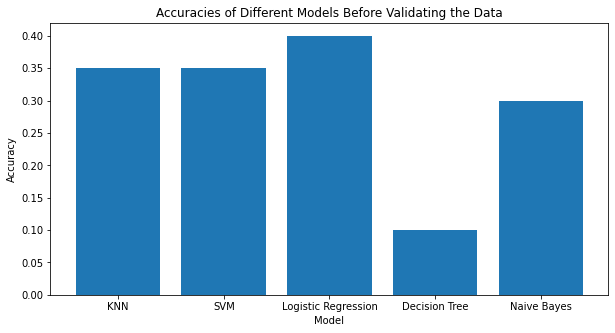

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(modelName, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Models Before Validating the Data')
plt.show()

# Applying validation

## KNN

In [ ]:
k_vals=[]
mean_accuracies=[]
exec_time=[]

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import time

kf = KFold(n_splits=5, random_state=None) 

accuracy =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]
    
    from sklearn.neighbors import KNeighborsClassifier  
    
    start = time.time()
    k=10
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    end = time.time()
    
    accuracy.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

acc=np.array(accuracy)    
print("\nMean: ",np.mean(acc))
    

0.1
0.25
0.3
0.6
0.6

Mean:  0.37


In [ ]:
k_vals.append(k)
mean_accuracies.append(np.mean(acc))
exec_time.append(end-start)

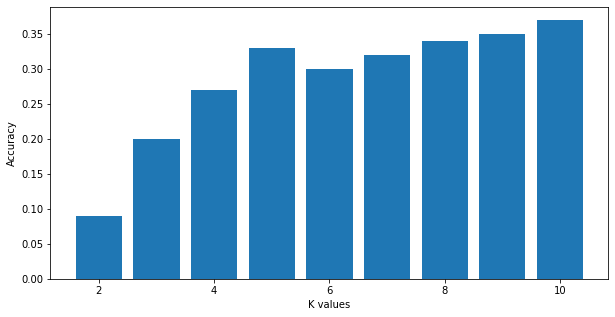

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(k_vals, mean_accuracies)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()

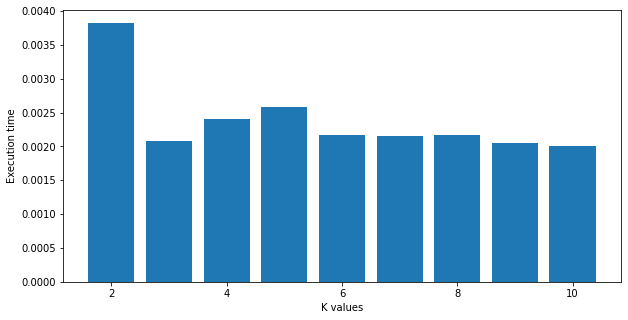

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(k_vals, exec_time)
plt.xlabel('K values')
plt.ylabel('Execution time')
plt.show()

## SVM

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5, random_state=None) 
# X is the feature set and y is the target

accuracy =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]
    
    from sklearn.svm import SVC
    svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
    svm_predictions = svm_model_linear.predict(X_test)
    
    svm_accuracy=accuracy_score(y_test,svm_predictions)
    accuracy.append(svm_accuracy)
    print(accuracy_score(y_test, svm_predictions))

acc=np.array(accuracy)    
print("\nMean: ",np.mean(acc))
    

0.15
0.25
0.3
0.65
0.65

Mean:  0.4


## Logistic Regression

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5, random_state=None) 
# X is the feature set and y is the target

accuracy =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]
    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=1000,random_state=0,
                               solver='lbfgs', multi_class='multinomial')
    model.fit(X_train, y_train)

    predicted = model.predict(X_test)
    logistic_accuracy=accuracy_score(y_test, predicted)

    accuracy.append(logistic_accuracy)
    print(accuracy_score(y_test, predicted))

acc=np.array(accuracy)    
print("\nMean: ",np.mean(acc))
    

0.15
0.3
0.35
0.65
0.65

Mean:  0.42000000000000004


## Decision Tree

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5, random_state=None) 
# X is the feature set and y is the target

accuracy =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]
    
    from sklearn.tree import DecisionTreeClassifier

    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    tree_accuracy=accuracy_score(y_test, pred)

    accuracy.append(tree_accuracy)
    print(accuracy_score(y_test, pred))

acc=np.array(accuracy)    
print("\nMean: ",np.mean(acc))
    

0.0
0.2
0.25
0.2
0.4

Mean:  0.21000000000000002


## Naive Bayes

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5, random_state=None) 
# X is the feature set and y is the target

accuracy =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]
    
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    gnb_predict =gnb.predict(X_test)
    gnb_accuracy=accuracy_score(y_test, gnb_predict)

    accuracy.append(gnb_accuracy)
    print(accuracy_score(y_test, gnb_predict))

acc=np.array(accuracy)    
print("\nMean: ",np.mean(acc))
    

0.15
0.3
0.2
0.6
0.65

Mean:  0.38


## Naive Bayes -Implementation

In [ ]:
import math
import numpy as np
from sklearn.model_selection import train_test_split 

arr=data.values
X=arr[:,0:3]
Y=arr[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)  

class NaiveBayes():
    
  def fit(self, X, y):
    self.X = X
    self.y = y
    self.classes = np.unique(y)
    self.parameters = []
    for i, c in enumerate(self.classes):
      X_where_c = X[np.where(y == c)]
      self.parameters.append([])
      for col in X_where_c.T:
        parameters = {"mean": col.mean(), "var": col.var()}
        self.parameters[i].append(parameters)
              
              
  def likelihood(self, mean, var, x):
    m = 0.01
    gaussian = (1.0 / math.sqrt(2.0 * math.pi * var + m))*(math.exp(-(math.pow(x - mean, 2) / (2 * var + m))))
    return gaussian
  
  def prior(self, target):
    return np.mean(self.y == target)
  
  def predict(self, X):
    y_pred = []
    for j in X:
      posteriors = []
      for i, c in enumerate(self.classes):
        posterior = self.prior(c)
        for feature_value, params in zip(j, self.parameters[i]):
          likelihood = self.likelihood(params["mean"], params["var"], feature_value)
          posterior *= likelihood
        posteriors.append(posterior)
      y_pred.append(self.classes[np.argmax(posteriors)])
    return y_pred

In [ ]:
model = NaiveBayes()
model.fit(X_train,y_train)
pred = model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,pred))

Accuracy:  0.3


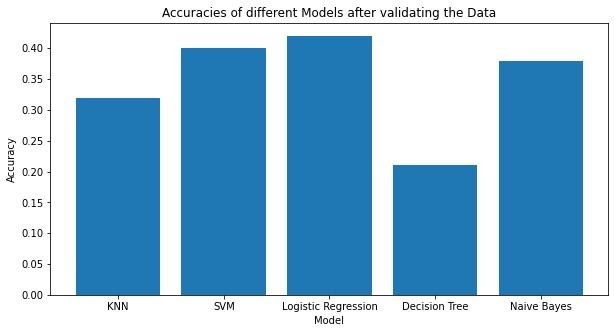

In [ ]:
model_name2=["KNN","SVM","Logistic Regression","Decision Tree","Naive Bayes"]
acc_val=[0.32,0.40,0.42,0.21,0.38]
fig = plt.figure(figsize = (10, 5))
plt.bar(model_name2, acc_val)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracies of different Models after validating the Data')
plt.show()
